### Conditional GAN

# Setup

In [2]:
!pip install ctgan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.4 MB/s eta 0:00:00


In [31]:
!pip install table_evaluator

In [19]:
# Import libraries
import torch
import pandas as pd
import seaborn as sns
import torch.nn as nn

from ctgan import CTGAN
from ctgan.synthesizers.ctgan import Generator


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/FinalData/TRAINING_NORMAL_TRY2_Group1.csv')

In [21]:
categorical_features = ['Label']

#Model training

In [24]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data,categorical_features, epochs = 700)


Gen. (-1.13) | Discrim. (0.25): 100%|██████████| 700/700 [01:36<00:00,  7.23it/s]


#Synthetic data generation

In [28]:
synthetic_data = ctgan.sample(500)

In [29]:
synthetic_data

,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,T7_GAMMA,...,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA,Label
0,-0.107262,-0.159245,-0.090098,-0.140310,-0.732548,-0.241327,0.892873,-0.747506,-0.615520,-0.652408,...,-0.033055,-0.136557,-0.227853,-0.142447,0.000260,-0.223810,-0.151412,-0.310081,-0.423968,2
1,-0.195638,-0.218083,0.045988,0.079350,-0.634403,-0.195451,0.388493,-0.245767,0.365344,-0.455459,...,-0.045799,-0.037452,-0.217660,0.104416,-0.163627,-0.153393,-0.005230,0.066773,-0.574680,3
2,-0.252550,-0.105088,-0.009670,-0.192456,-0.465164,-0.197657,-0.161521,-0.552373,0.436509,-0.921236,...,-0.163255,-0.218247,-0.205686,-0.093662,-0.068220,-0.190100,-0.023608,-0.008643,-0.409091,3
3,-0.101269,-6.456735,-0.094495,-0.138083,-0.113705,-0.295060,-0.175739,-0.600334,-0.650184,-0.693393,...,-0.154720,-0.109162,-0.094688,0.079793,0.099374,-0.148665,-0.116699,-0.310961,-0.284867,4
4,-0.167074,-0.157734,0.021425,-0.241857,0.706689,-0.191784,-0.191160,0.225754,1.909555,-0.850613,...,-0.064002,-0.076819,0.003750,-0.190878,-0.051537,-0.122167,-0.218252,-0.138837,-0.289284,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.273158,-0.240739,0.049646,-0.269483,-0.275842,-0.197359,0.023150,-0.477024,-0.795992,-1.048377,...,0.023202,-0.188036,-0.230376,-0.029727,0.045128,-0.140675,-0.086664,-0.211573,-0.262824,4
496,-0.280062,-0.205295,0.084735,-0.233294,-0.146853,-0.322034,0.161244,-0.245621,-0.300760,-0.884401,...,0.009523,-0.213792,0.089363,0.149470,0.090888,-0.102793,-0.038721,-0.205999,-0.484591,4
497,-0.339269,-0.198117,-0.032374,-0.189023,-0.373448,-0.270093,-0.157845,-0.413145,0.632262,-0.869187,...,-0.081989,-0.108674,0.021357,-0.149674,-0.139384,-0.065325,-0.098262,-0.028776,0.252122,3
498,-0.364389,-0.162953,-0.046248,-0.332008,-0.288333,-0.233900,-0.064807,-0.618207,1.903261,-1.437526,...,-0.058501,-0.217446,-0.094031,-0.086916,0.194308,-0.212789,-0.087346,-0.214442,-0.452409,1


#Evaluation

(347, 26) (500, 26)


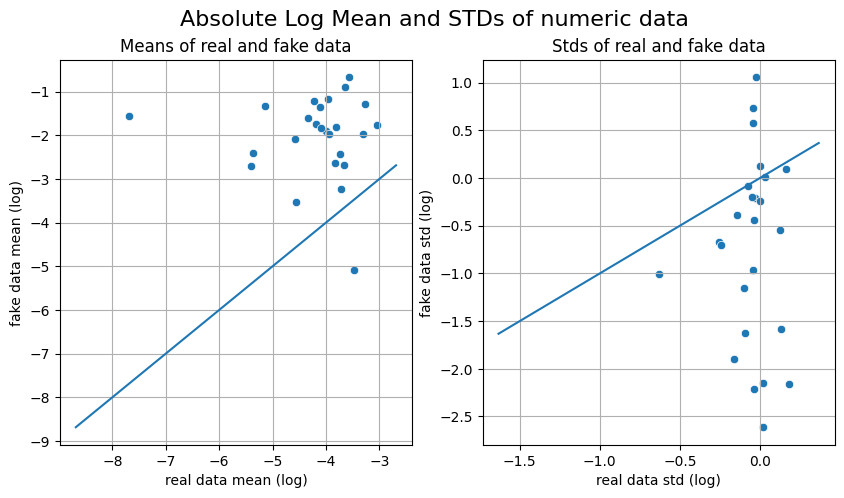

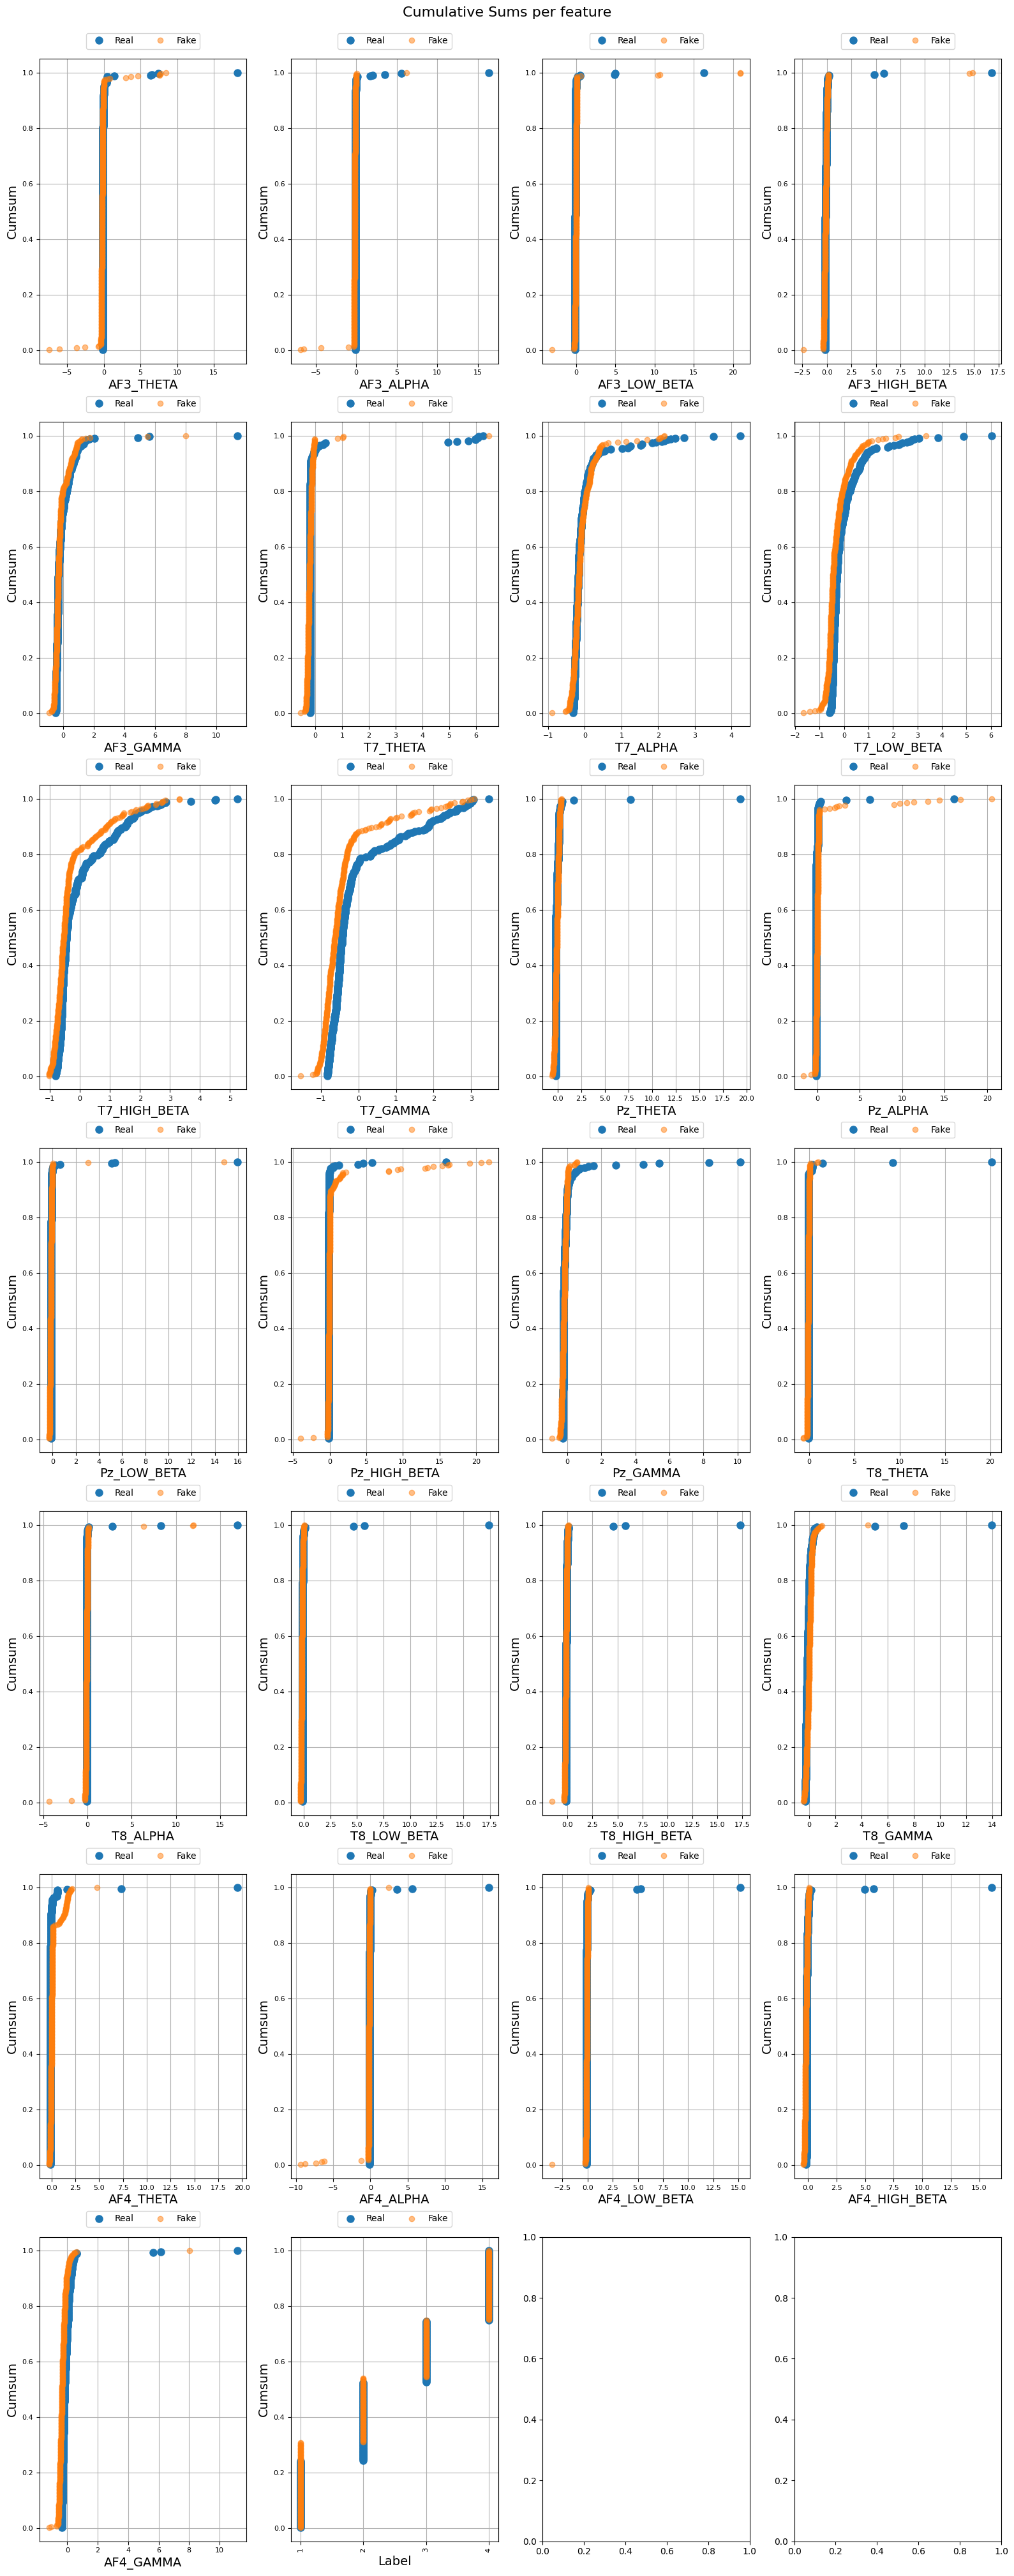

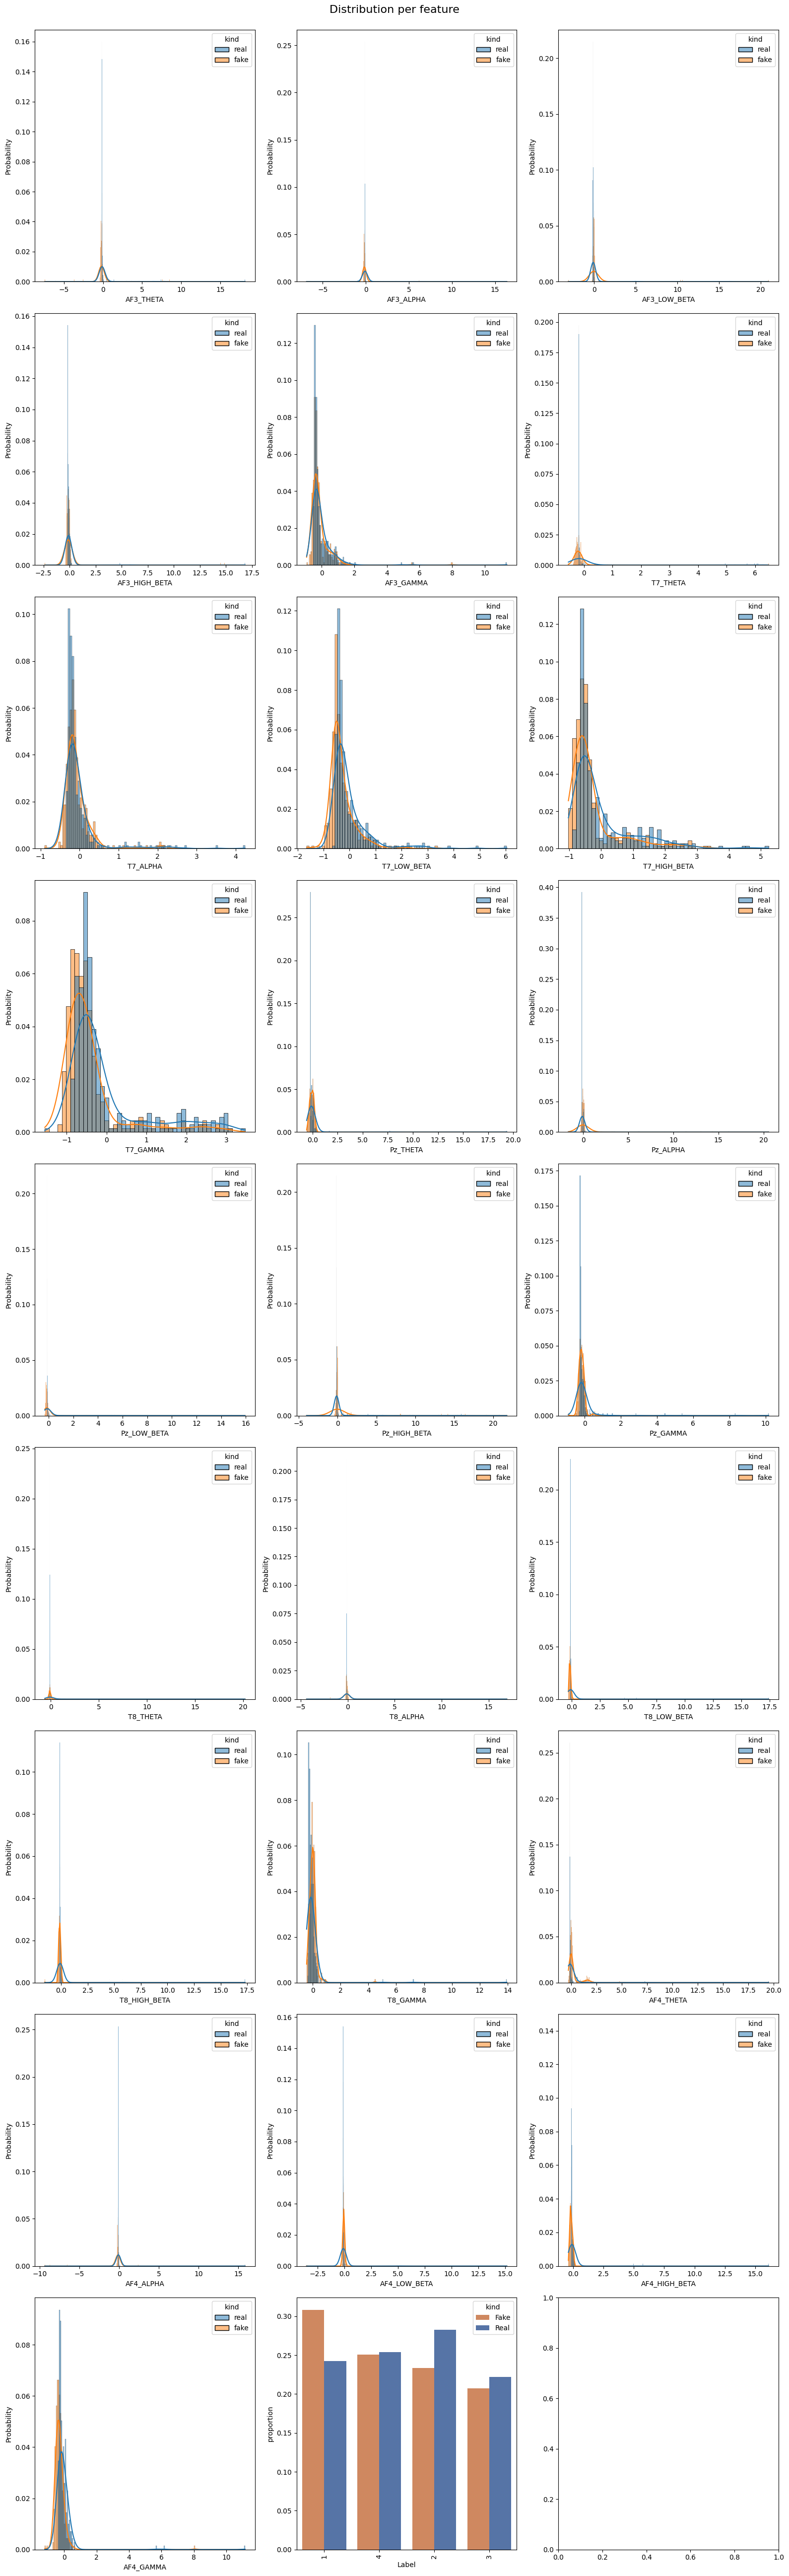

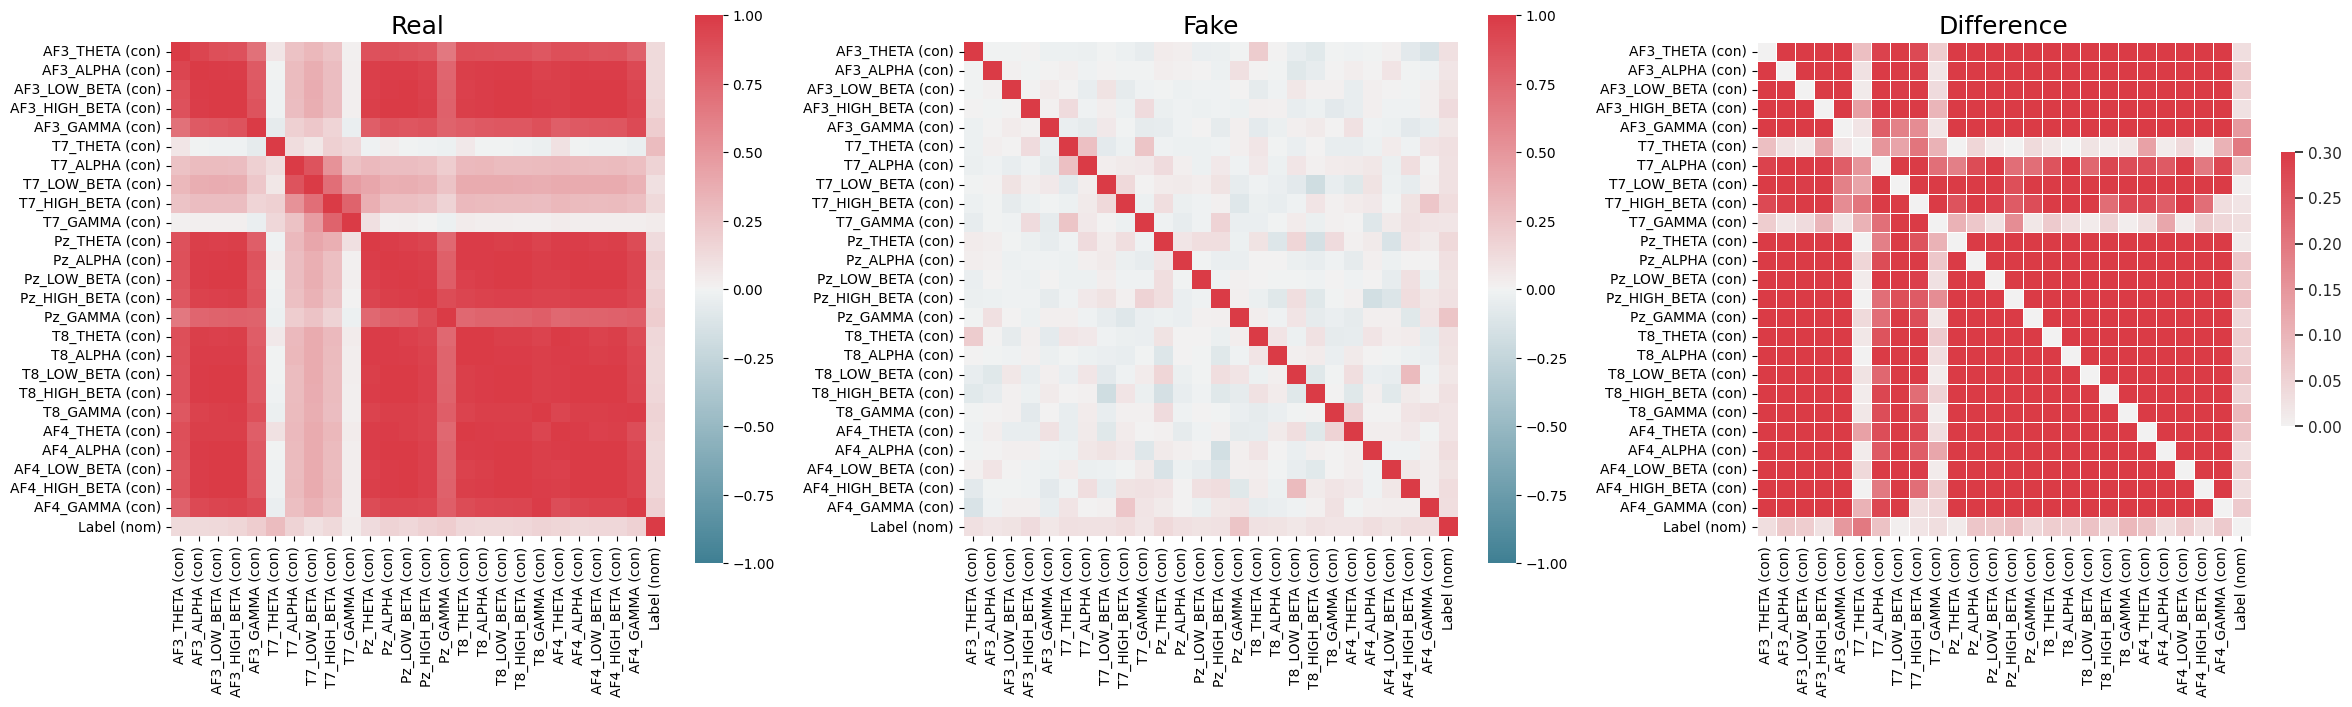

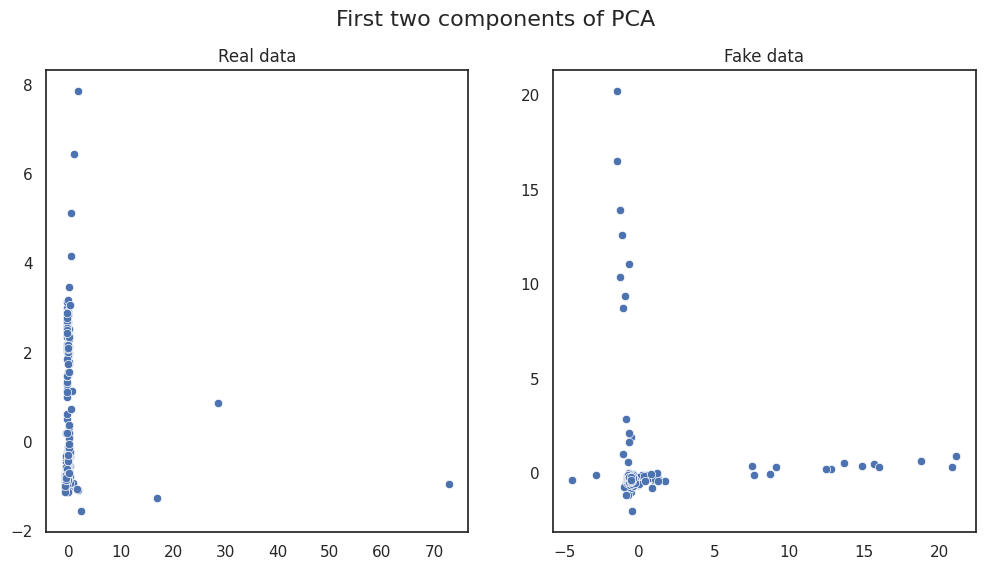

In [32]:
from table_evaluator import TableEvaluator

print(data.shape, synthetic_data.shape)
table_evaluator = TableEvaluator(data, synthetic_data, cat_cols=categorical_features)
table_evaluator.visual_evaluation()
# compute the correlation matrix
corr = synthetic_data.corr()

# Downoading CSV

In [34]:
combined_data = pd.concat([data, synthetic_data], ignore_index=True)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize feature distributions
def visualize_feature_distributions(original_data, generated_data):
    for column in original_data.columns:
        plt.figure(figsize=(12, 6))
        sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
        sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)
        plt.title(f'Feature Distribution: {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# Function to visualize class distributions
def visualize_class_distribution(original_labels, generated_labels):
    plt.figure(figsize=(8, 5))
    sns.countplot(original_labels, label='Original', color='blue')
    sns.countplot(generated_labels, label='Generated', color='orange')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


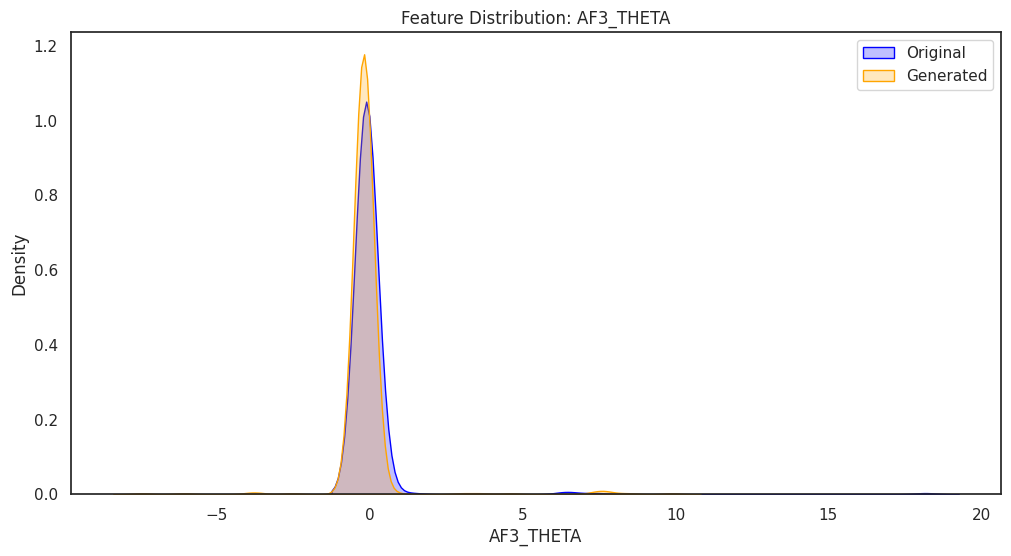

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


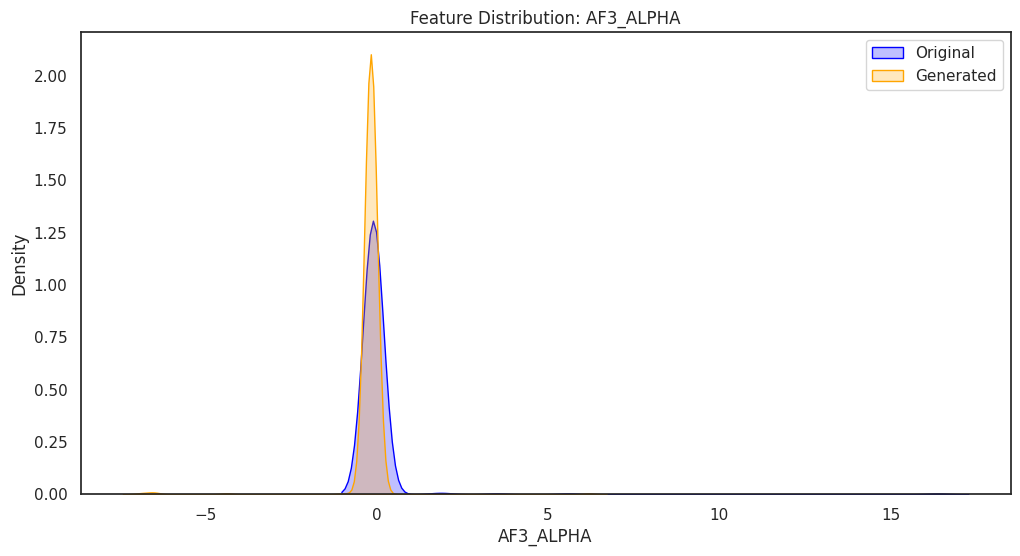

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


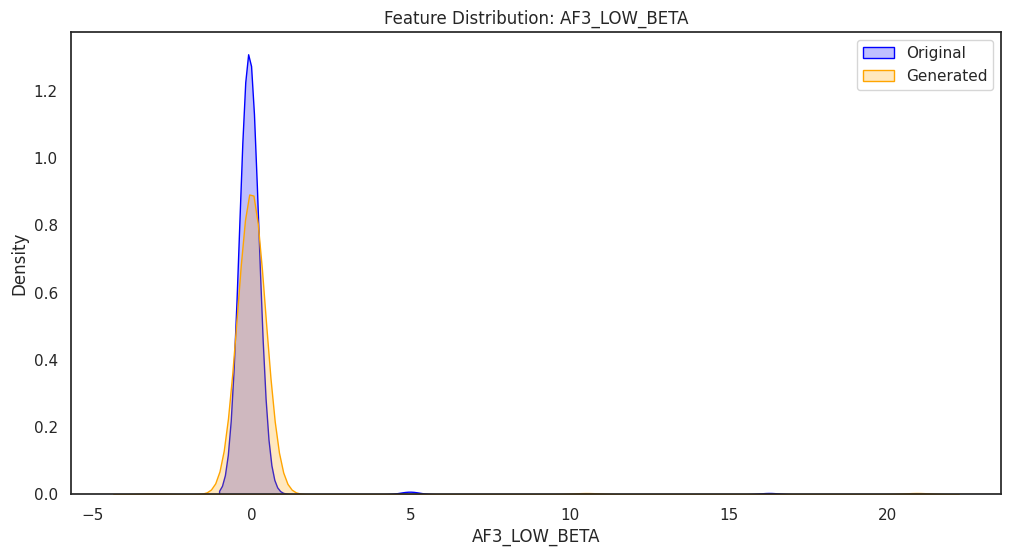

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


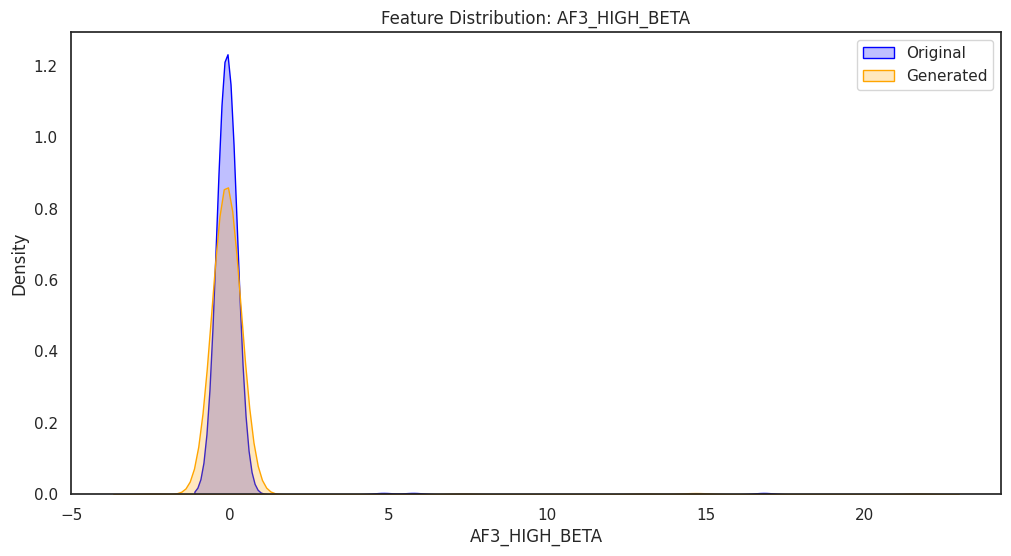

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


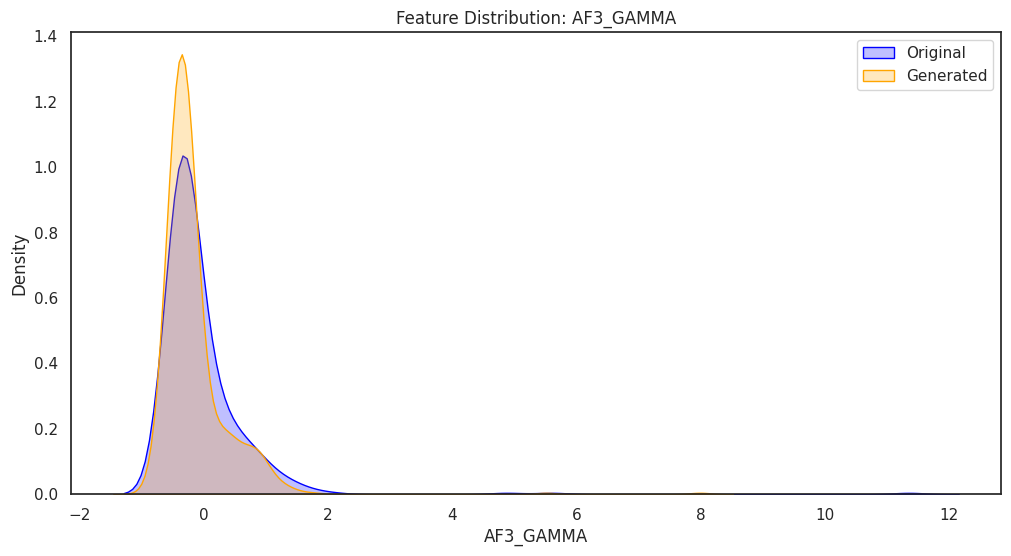

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


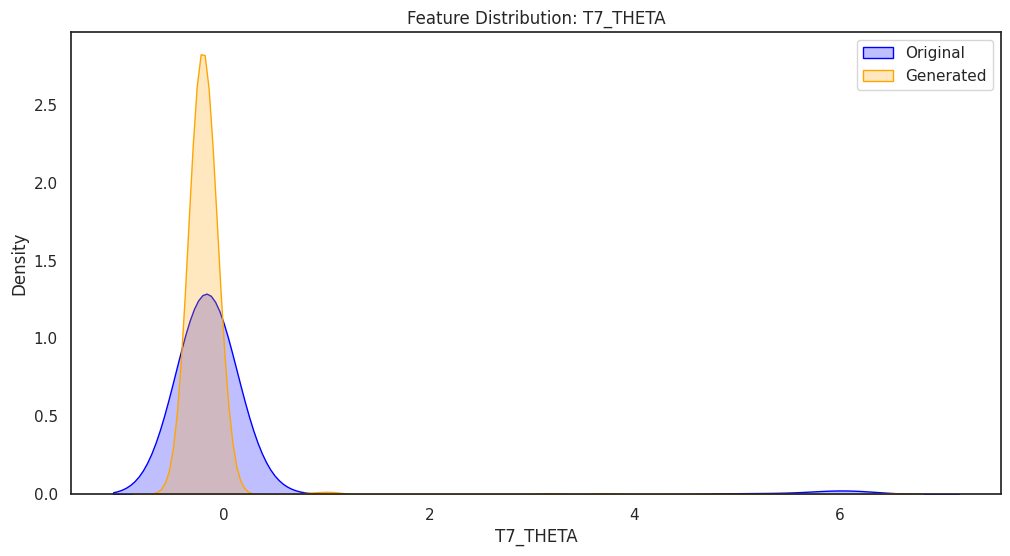

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


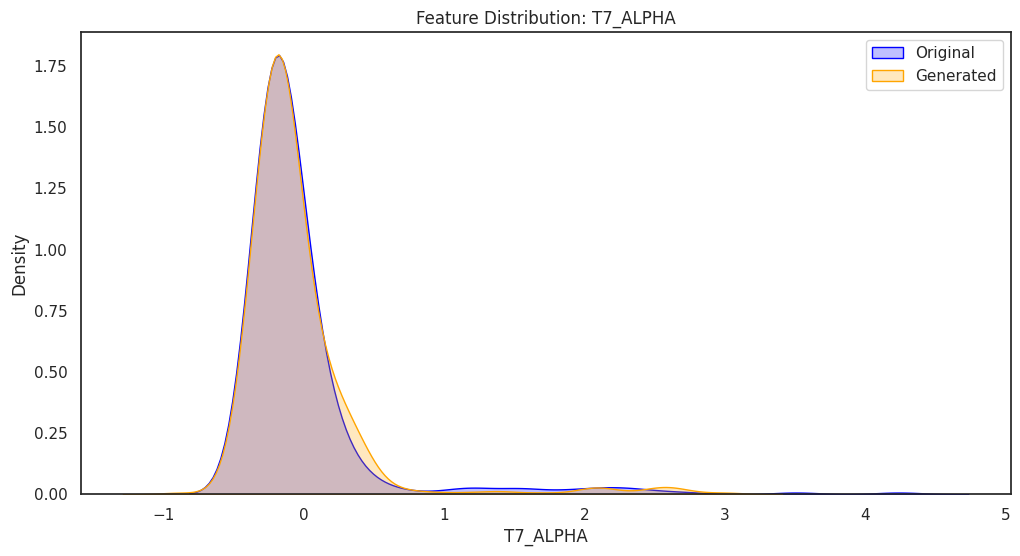

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


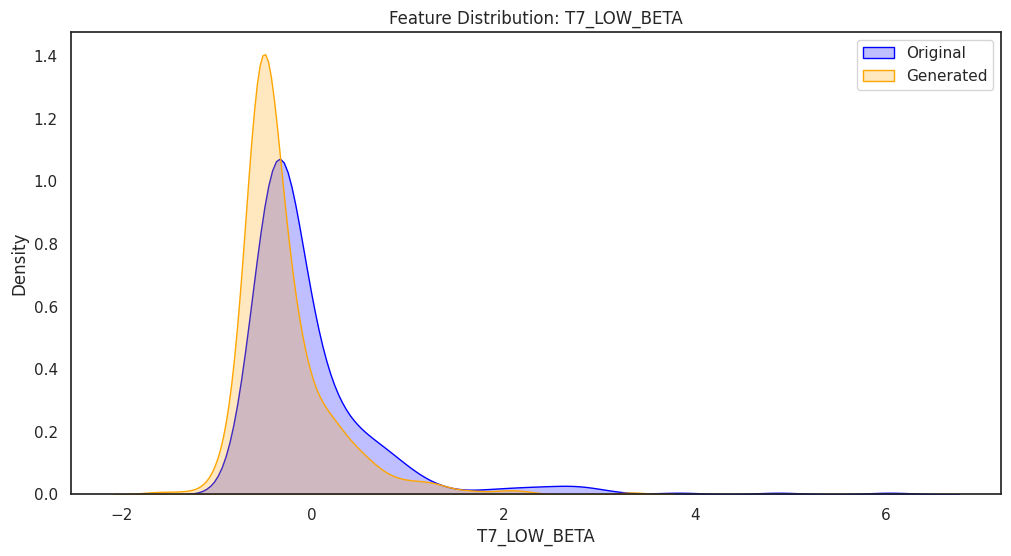

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


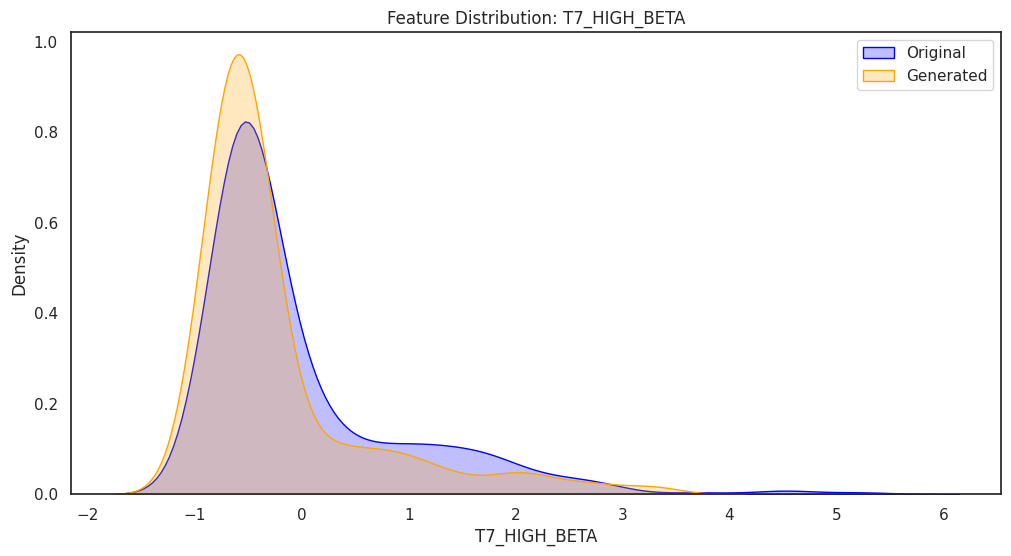

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


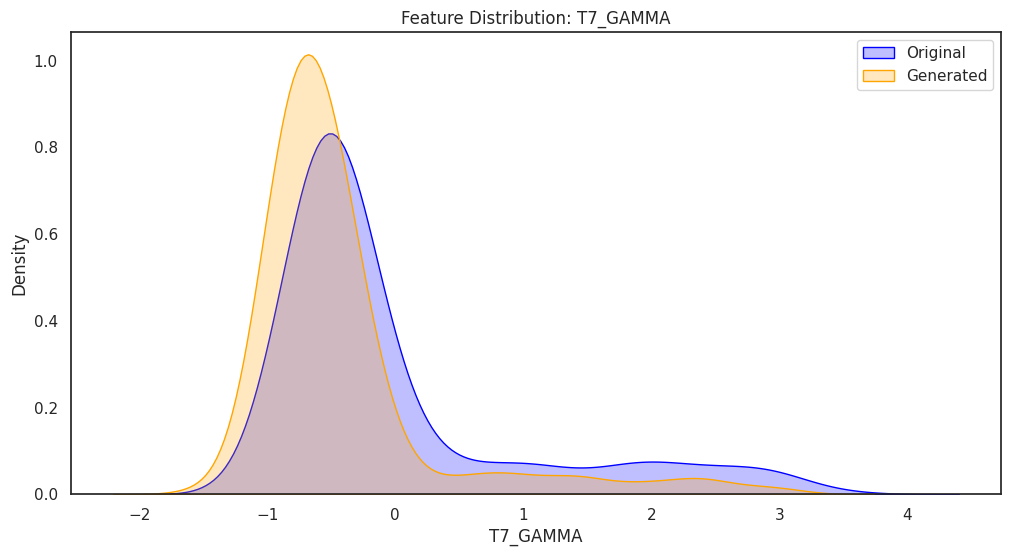

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


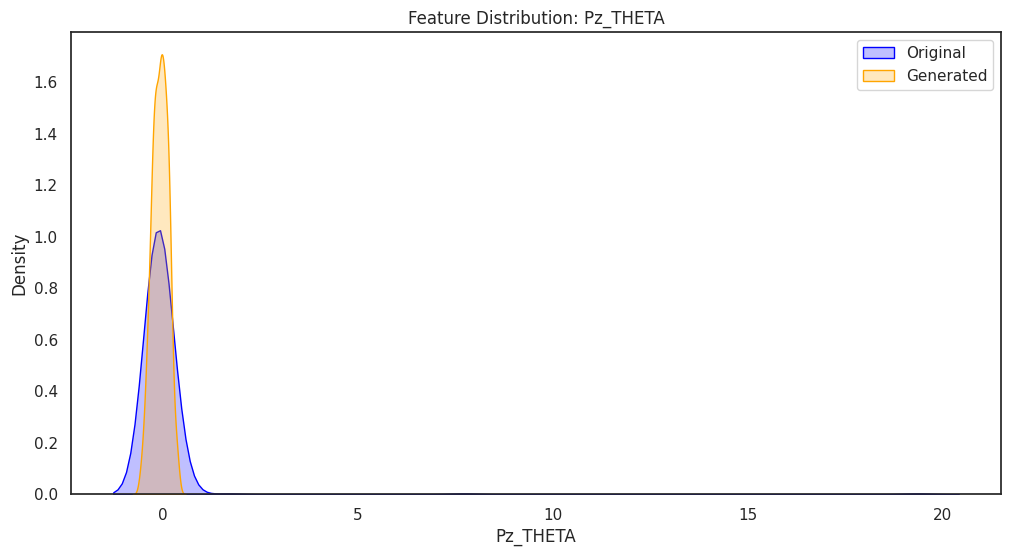

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


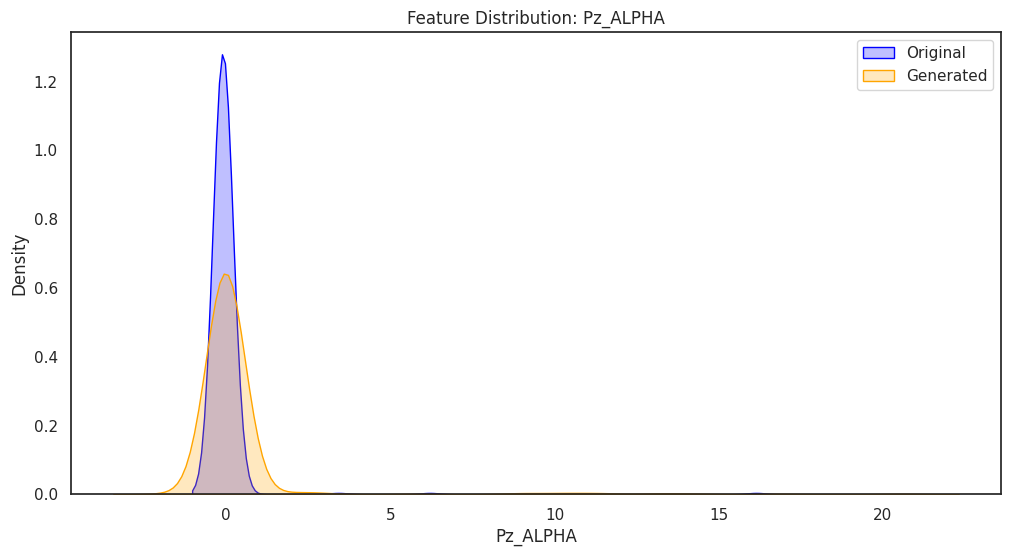

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


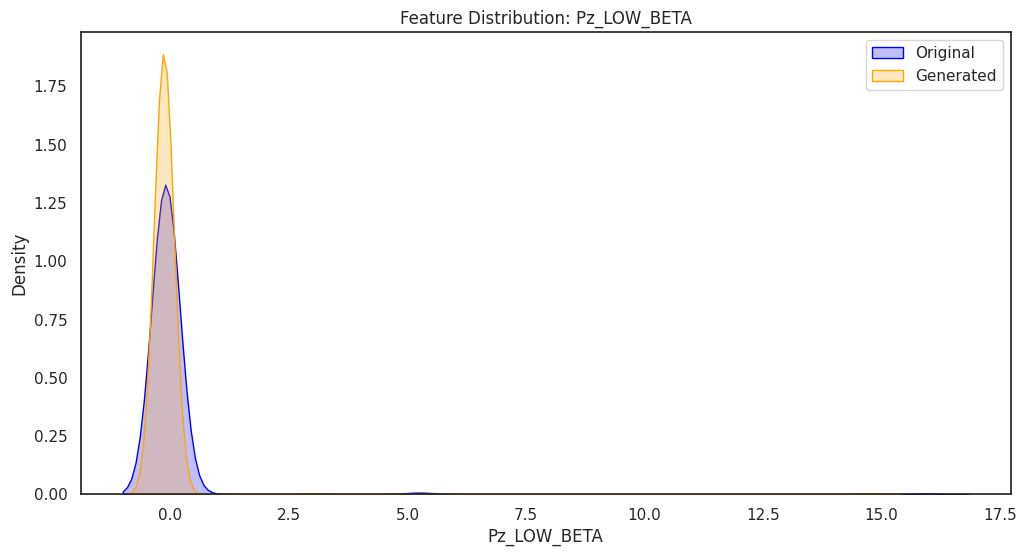

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


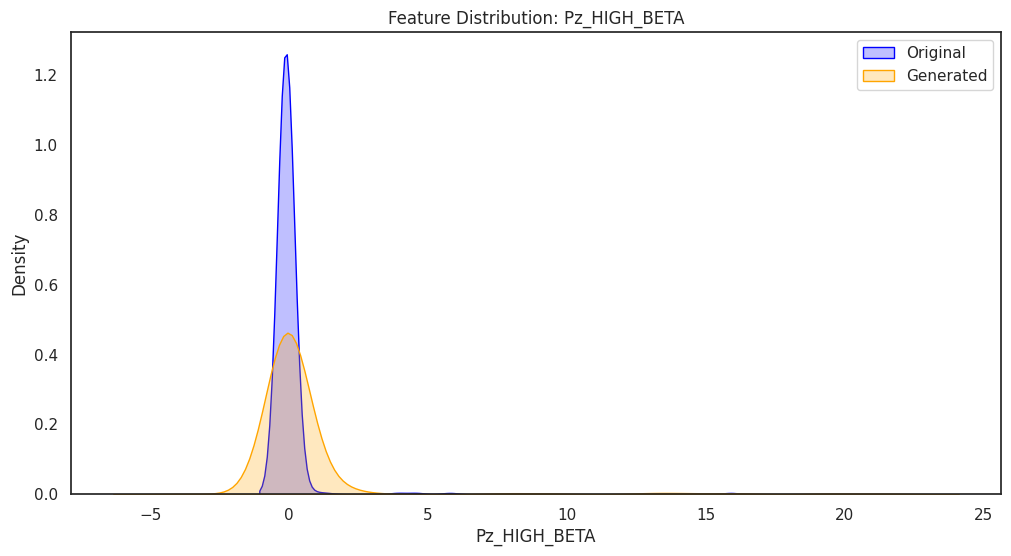

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


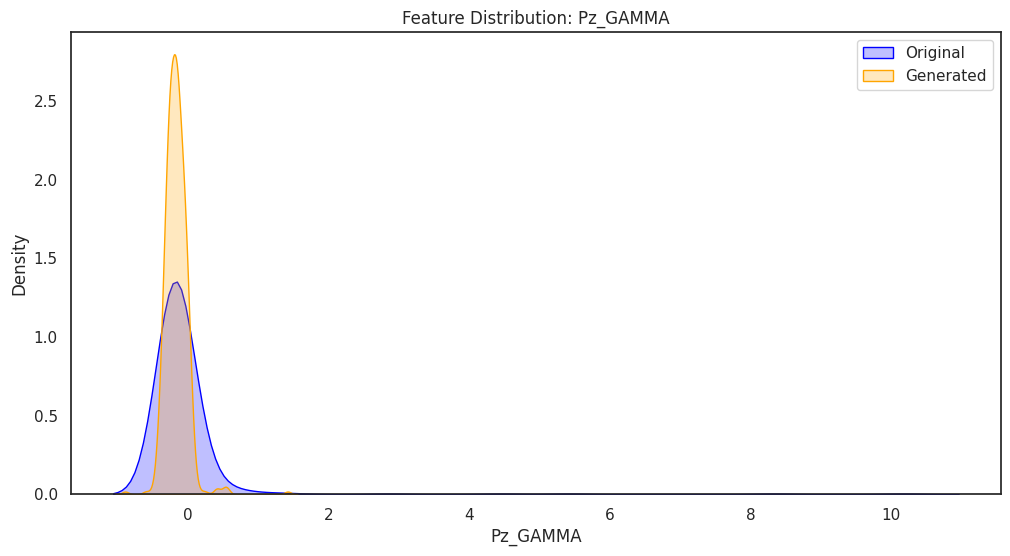

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


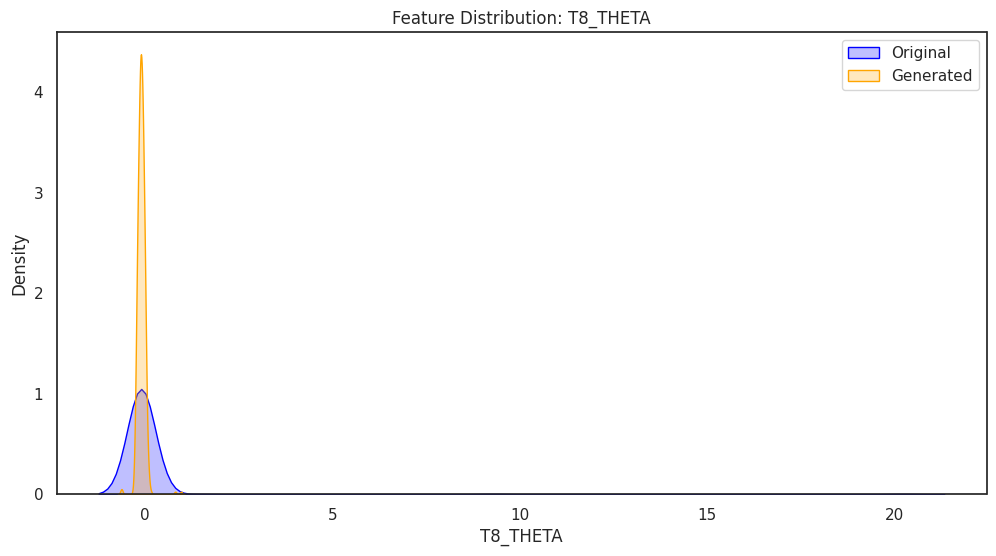

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


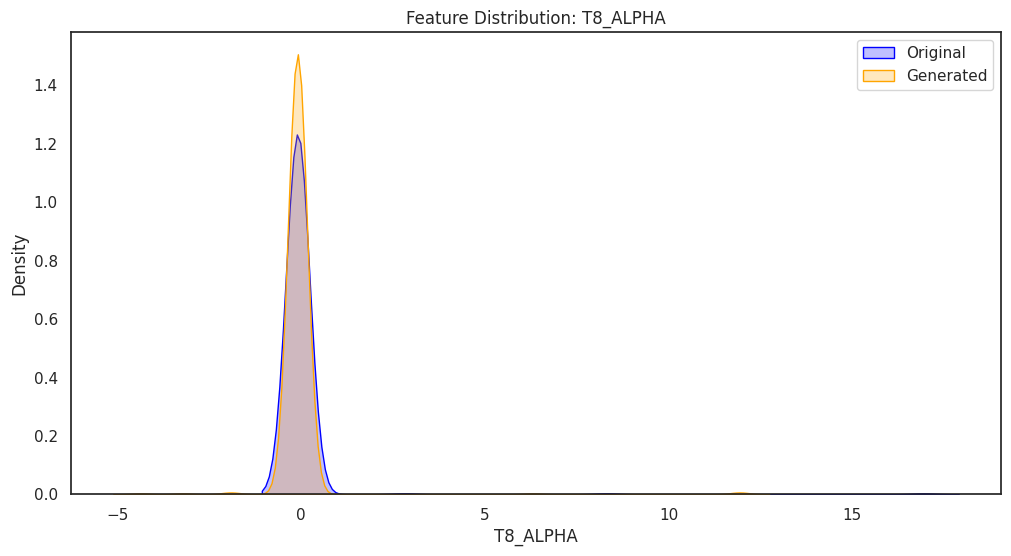

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


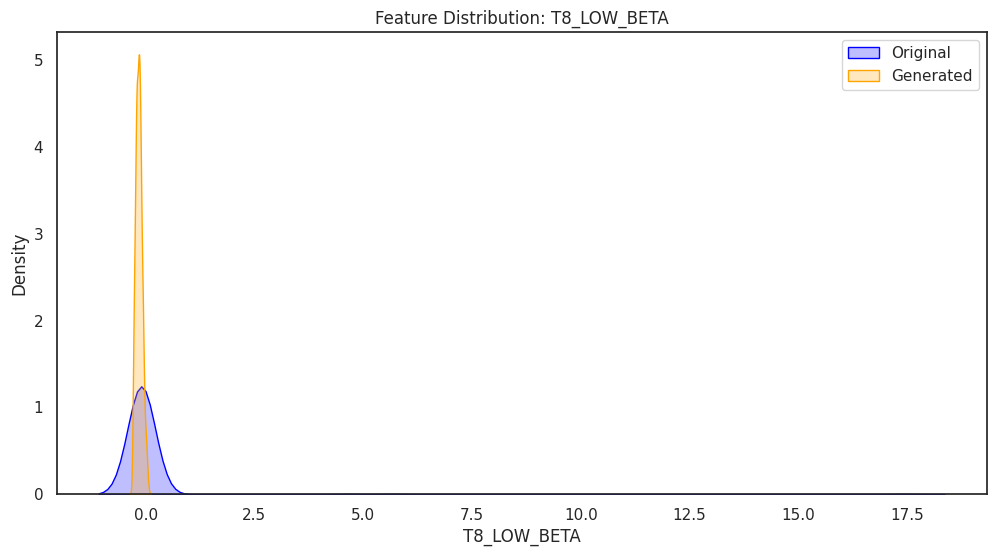

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


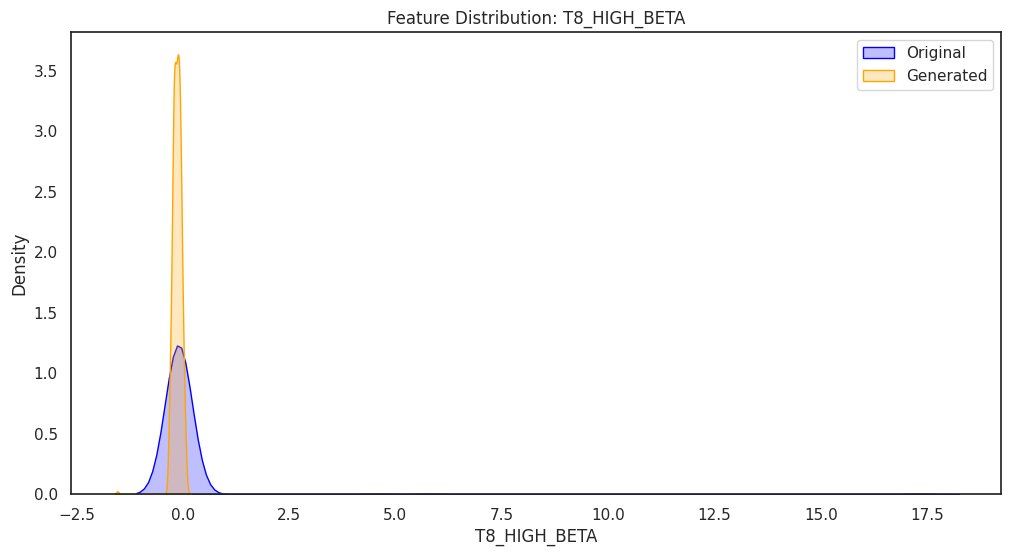

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


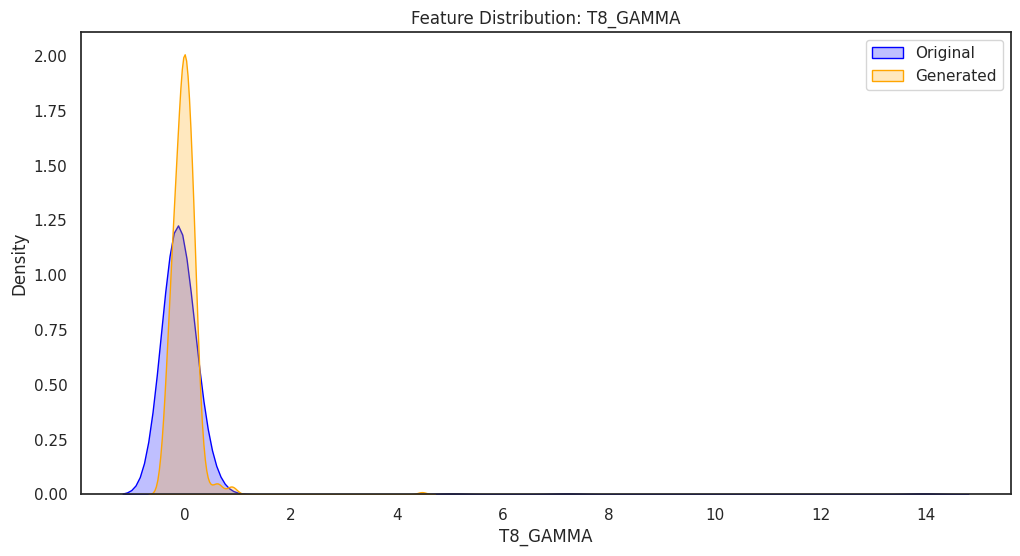

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


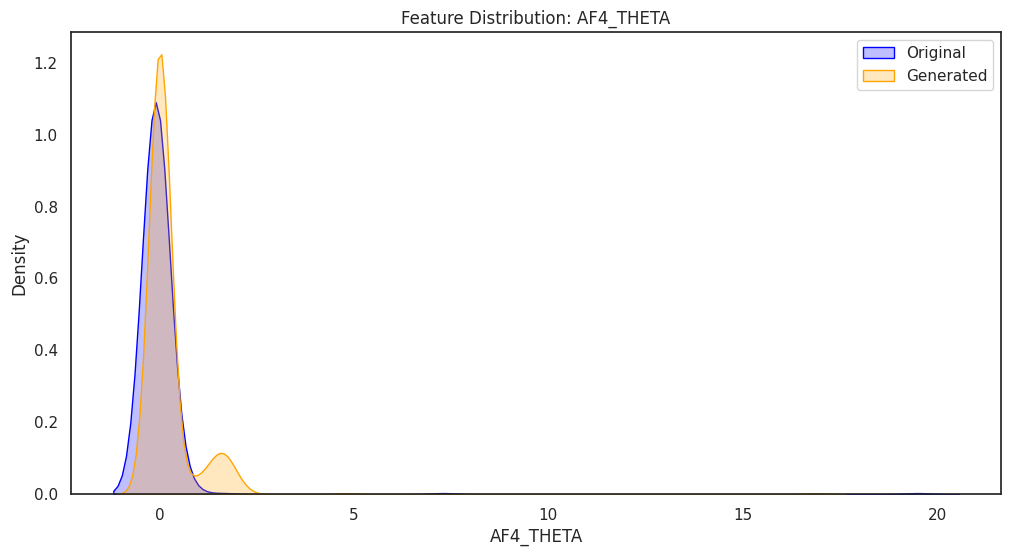

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


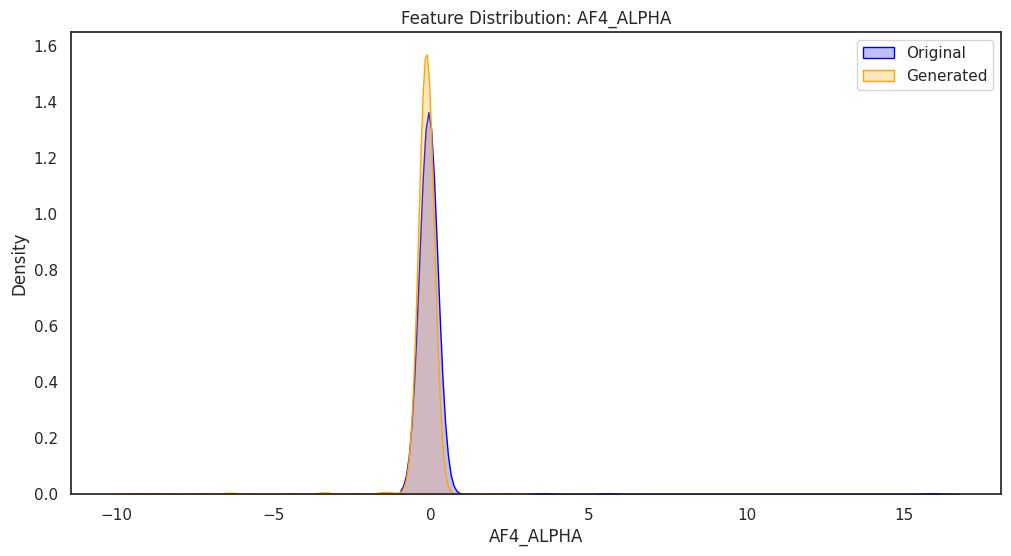

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


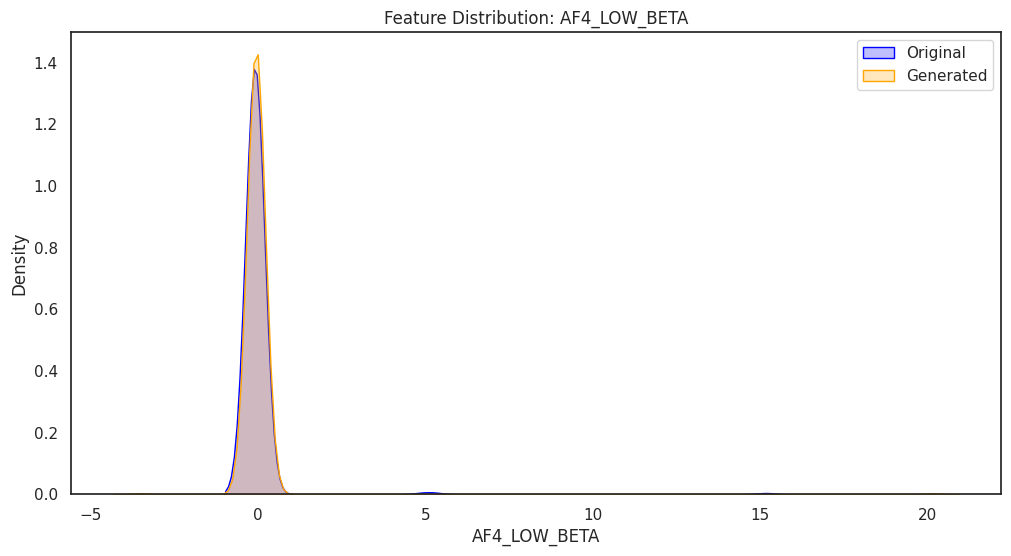

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


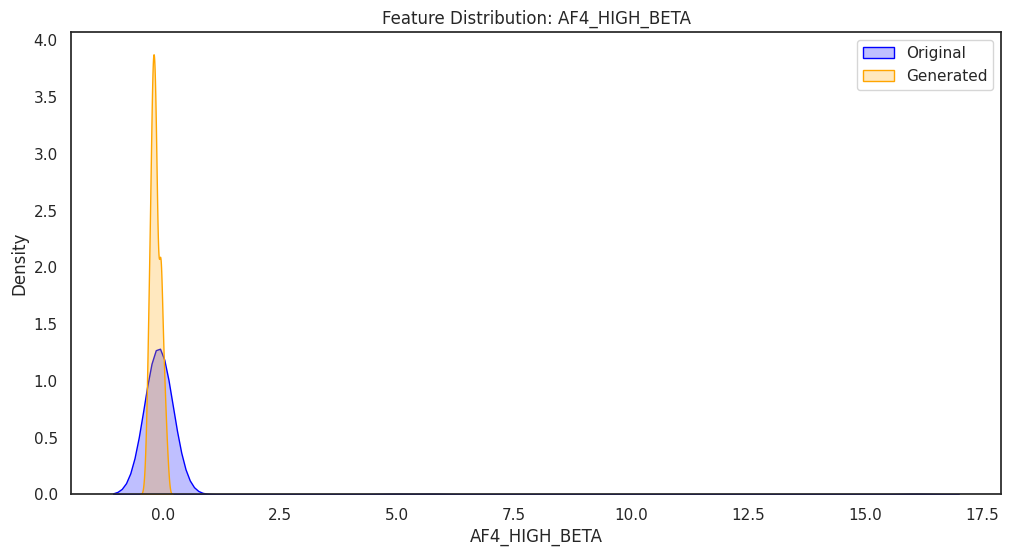

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


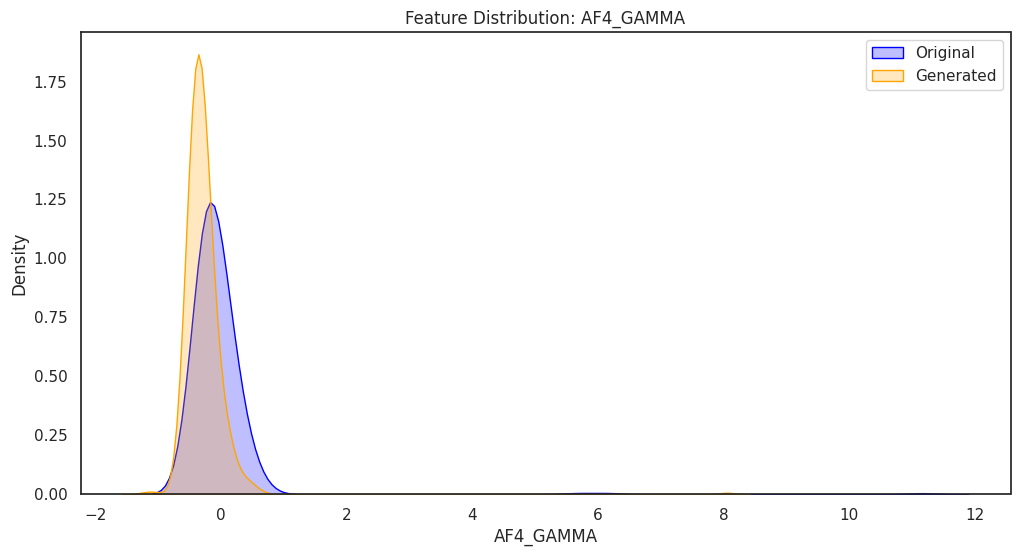

<ipython-input-36-9d697f8817f2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data[column], label='Original', color='blue', shade=True)
<ipython-input-36-9d697f8817f2>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_data[column], label='Generated', color='orange', shade=True)


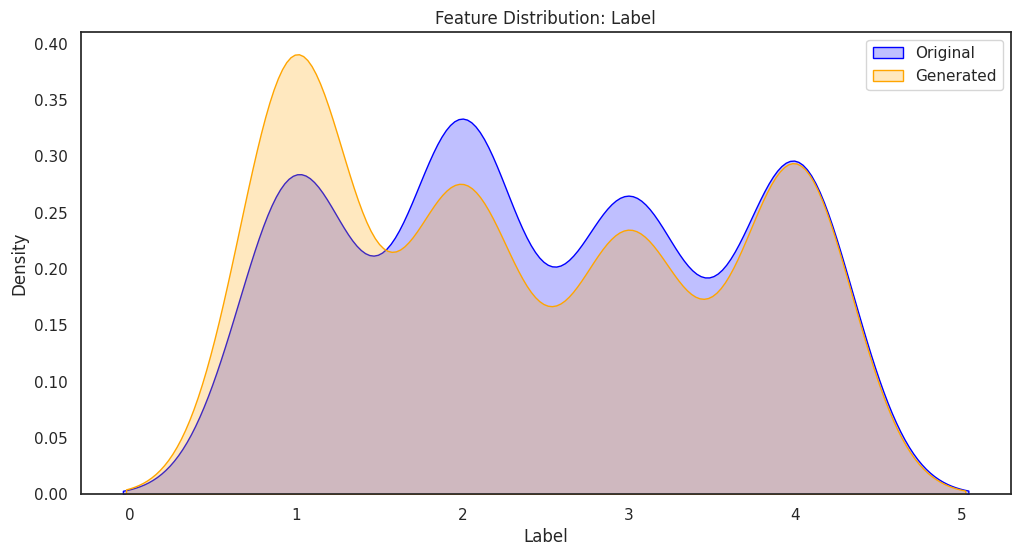

In [37]:
# Visualize feature distributions
visualize_feature_distributions(data, synthetic_data)

In [35]:
combined_data

,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,T7_GAMMA,...,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA,Label
0,-0.147588,-0.100608,-0.048115,0.042710,0.042068,-0.189434,-0.209266,-0.109004,-0.629179,-0.650064,...,-0.091760,-0.077993,-0.097806,-0.105368,-0.131180,-0.098244,-0.078042,-0.106148,-0.041802,3
1,-0.127351,-0.109048,-0.095314,-0.142228,-0.289192,-0.180126,0.384153,-0.032895,1.375017,3.469404,...,-0.098698,-0.097637,-0.118785,-0.176886,-0.110880,-0.100034,-0.079489,-0.125543,-0.204004,3
2,6.522014,5.592070,5.003517,5.783953,5.607526,0.014291,2.160302,2.226861,2.703338,0.618133,...,8.305286,5.705707,5.781175,7.215056,7.291724,5.604605,4.915953,5.750507,6.159222,1
3,-0.121925,-0.115267,-0.122065,-0.167888,-0.428114,-0.182986,-0.098277,-0.273969,-0.573792,-0.580964,...,-0.098151,-0.114345,-0.129137,-0.254882,-0.105674,-0.104219,-0.121479,-0.150528,-0.305949,1
4,-0.089338,-0.091455,-0.124833,-0.157975,-0.281993,-0.189324,-0.306077,-0.504699,-0.485845,-0.503434,...,-0.094566,-0.114613,-0.100089,-0.065233,-0.055233,-0.081137,-0.118387,-0.139293,-0.128401,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,-0.273158,-0.240739,0.049646,-0.269483,-0.275842,-0.197359,0.023150,-0.477024,-0.795992,-1.048377,...,0.023202,-0.188036,-0.230376,-0.029727,0.045128,-0.140675,-0.086664,-0.211573,-0.262824,4
843,-0.280062,-0.205295,0.084735,-0.233294,-0.146853,-0.322034,0.161244,-0.245621,-0.300760,-0.884401,...,0.009523,-0.213792,0.089363,0.149470,0.090888,-0.102793,-0.038721,-0.205999,-0.484591,4
844,-0.339269,-0.198117,-0.032374,-0.189023,-0.373448,-0.270093,-0.157845,-0.413145,0.632262,-0.869187,...,-0.081989,-0.108674,0.021357,-0.149674,-0.139384,-0.065325,-0.098262,-0.028776,0.252122,3
845,-0.364389,-0.162953,-0.046248,-0.332008,-0.288333,-0.233900,-0.064807,-0.618207,1.903261,-1.437526,...,-0.058501,-0.217446,-0.094031,-0.086916,0.194308,-0.212789,-0.087346,-0.214442,-0.452409,1


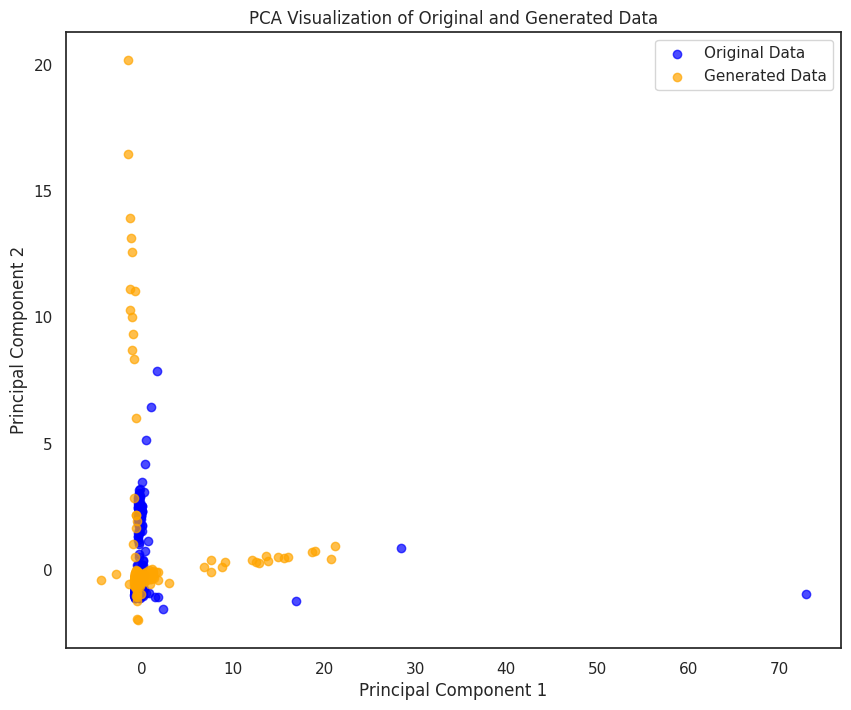

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert tensors to NumPy arrays for PCA
#original_data_np = data.numpy()
#generated_data_np = synthesized_data.detach().numpy()

# Perform PCA separately for original and generated data
pca_original = PCA(n_components=2)
pca_generated = PCA(n_components=2)

pca_result_original = pca_original.fit_transform(data)
pca_result_generated = pca_generated.fit_transform(synthetic_data)

# Create DataFrames for visualization
pca_df_original = pd.DataFrame(pca_result_original, columns=['PC1', 'PC2'])
pca_df_generated = pd.DataFrame(pca_result_generated, columns=['PC1', 'PC2'])

# Plot PCA results for original and generated data on the same plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_original['PC1'], pca_df_original['PC2'], label='Original Data', alpha=0.7, color='blue')
plt.scatter(pca_df_generated['PC1'], pca_df_generated['PC2'], label='Generated Data', alpha=0.7, color='orange')
plt.title('PCA Visualization of Original and Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [40]:
import pandas as pd
from google.colab import files


df = pd.DataFrame(combined_data)

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/New_GAN/newGan1.csv'
df.to_csv(csv_file_path, index=False)

# Download the CSV file
#files.download(csv_file_path)